In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Configuration ---
FILENAME = 'NaCl_sample_2_full_laser_Height.csv'
METADATA_ROWS = 19
DECIMAL_SEP = ','
DELIMITER = ';'

PIX_PER_UM = 1024./276.681

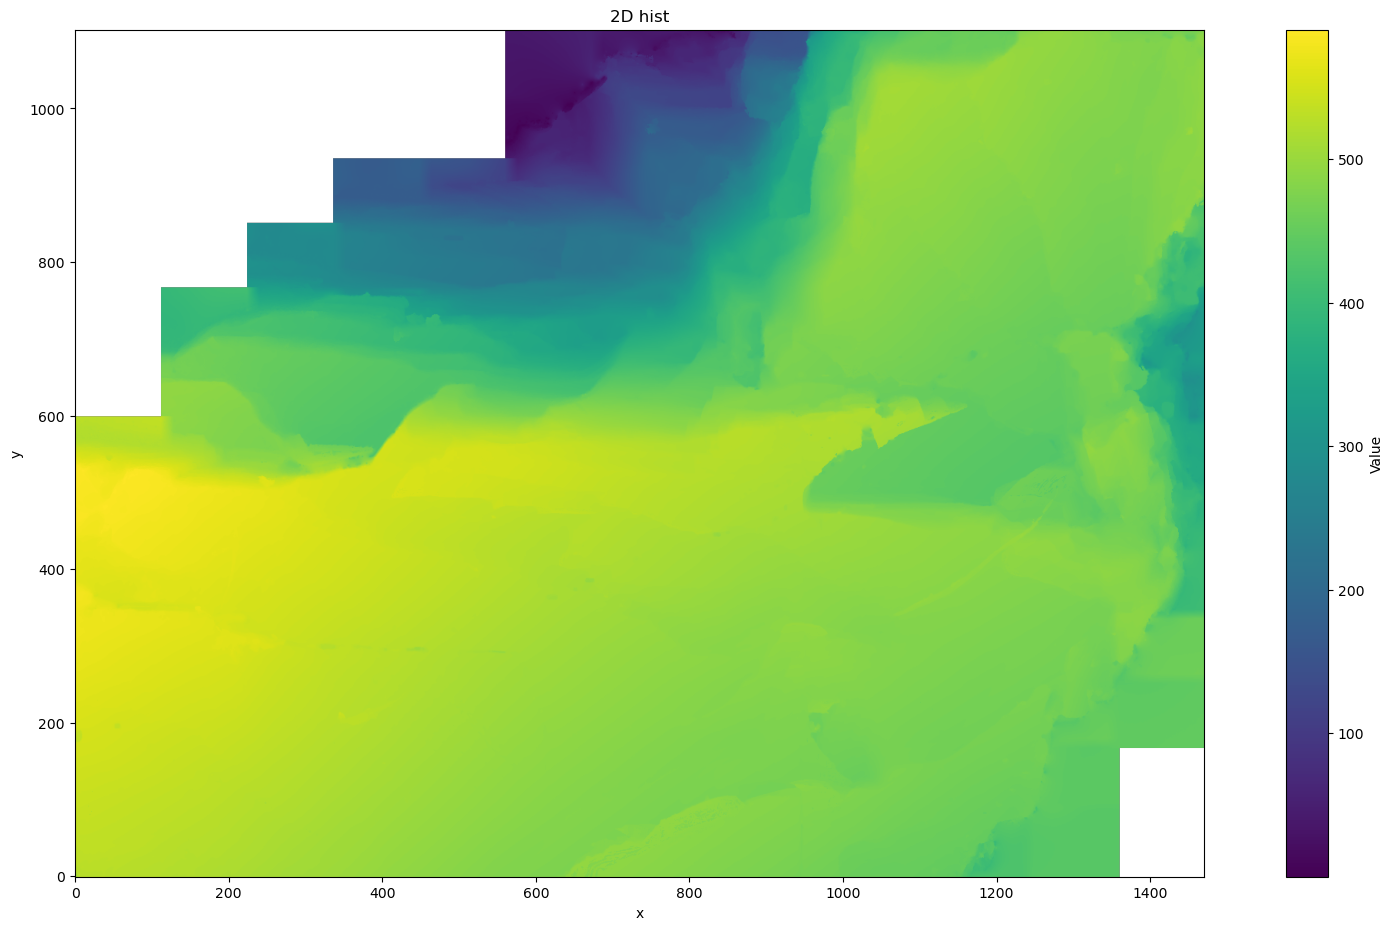

In [2]:
df = pd.read_csv(
    FILENAME, 
    sep=DELIMITER, 
    skiprows=METADATA_ROWS, 
    header=None,
    decimal=DECIMAL_SEP
)
data = df.astype(float).to_numpy()

plt.figure(figsize=(21, 11))
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('2D hist')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

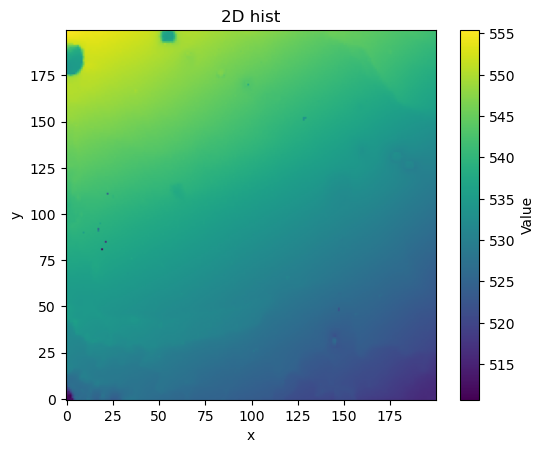

In [8]:
plt.imshow(data[:200, :200], cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('2D hist')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
H, W = data.shape

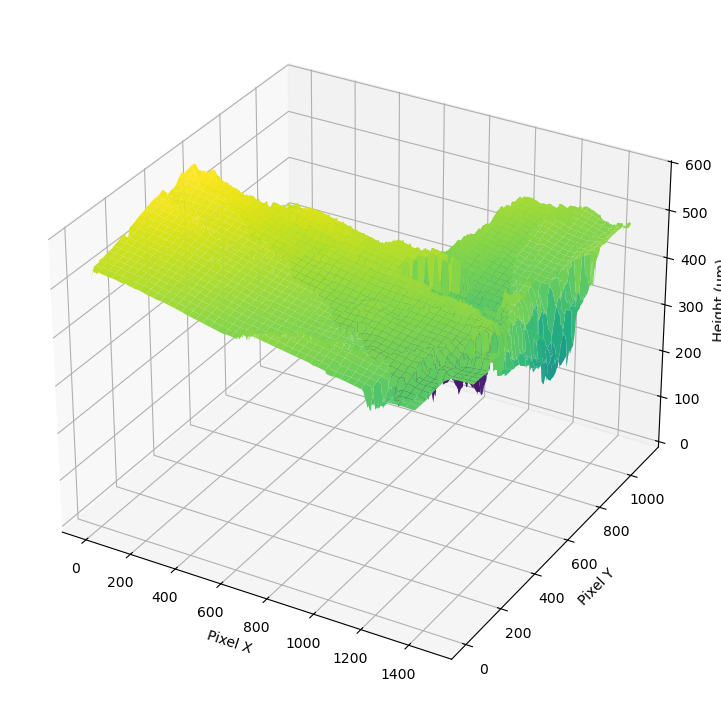

In [4]:

X = np.arange(W)
Y = np.arange(H)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, data, cmap='viridis', edgecolor='none')

ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')
ax.set_zlabel(f'Height (um)')

plt.show()
    

In [6]:
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = data.flatten()

A = np.c_[np.ones(z_flat.size), x_flat, y_flat]

C, _, _, _ = np.linalg.lstsq(A, z_flat, rcond=None)
fit_plane = C[0] + C[1] * X + C[2] * Y

detrended_map = data - fit_plane

plt.figure(figsize=(21, 11))
plt.imshow(detrended_map, cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('2D hist')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

LinAlgError: SVD did not converge in Linear Least Squares

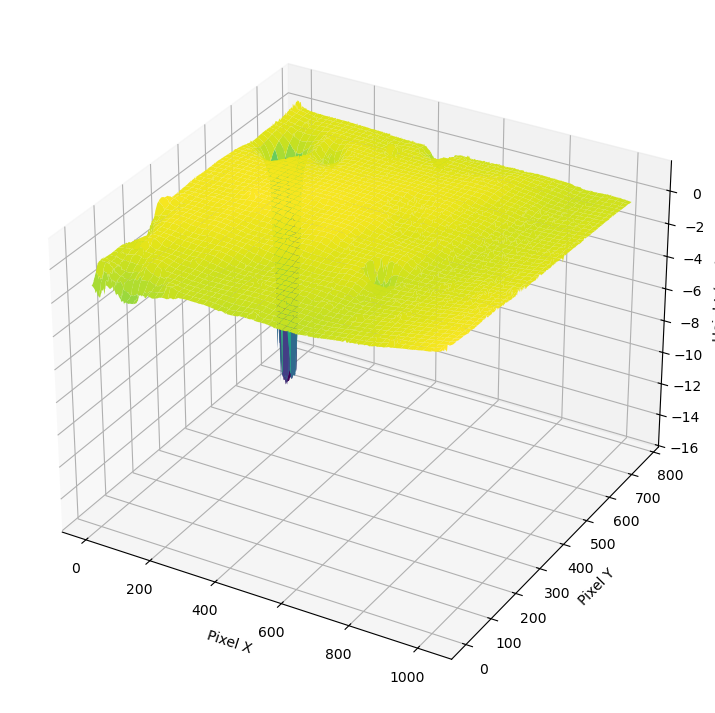

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, detrended_map, cmap='viridis', edgecolor='none')

ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')
ax.set_zlabel(f'Height (um)')

plt.show()

Text(0, 0.5, 'Z (um)')

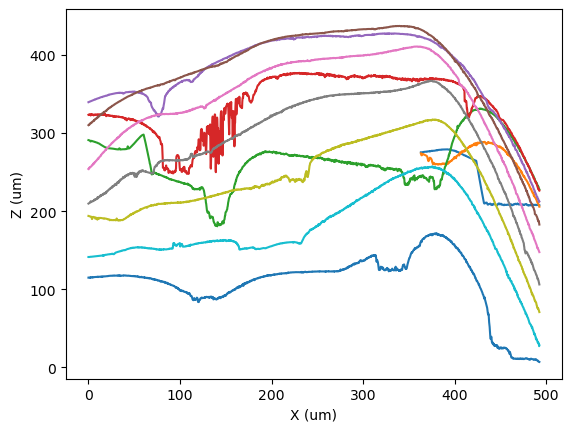

In [14]:
for line in data[:][::100]:
    plt.plot((X/PIX_PER_UM)[:][0], line)
plt.xlabel('X (um)')
plt.ylabel('Z (um)')
#plt.ylim(-3, 1)